We will use ML to train and calculate an accuracy score from this data [source](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from the University of California Irvine's machine learning data set. <br><br>
This dataset takes in handwritings and which is then pipelined to a table format (features), along with the actual digit it is suppose to be (labels)

# Import Libraries and Data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np

digits = load_digits()

digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [2]:
labels = digits['target']
data = pd.DataFrame(digits['data'])

In [3]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

In [4]:
np_image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

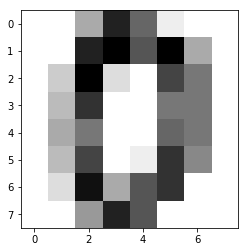

In [5]:
plt.imshow(np_image, cmap='gray_r')

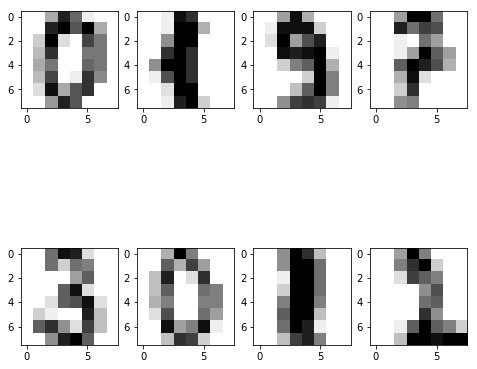

In [6]:
fig, ax = plt.subplots(2, 4, figsize = (8,8))

ax[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
ax[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
ax[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

ax[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
ax[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

# K-Nearest Neighbors and KFold validation

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


def train_and_test(nn, train_features, train_labels, test_features, test_labels):
    knn = KNeighborsClassifier(n_neighbors = nn)
    knn.fit(train_features, train_labels)
    
    prediction = knn.predict(test_features)
    
    accuracy = accuracy_score(test_labels, prediction)
    
    return accuracy

def cross_validate(k):
    kf = KFold(n_splits=4, random_state = 2)
    
    accuracy_scores = []
    
    for train_index, test_index in kf.split(data):
        train_features, train_labels = data.loc[train_index], labels[train_index]
        test_features, test_labels = data.loc[test_index], labels[test_index]
        
        score = train_and_test(k, train_features, train_labels, test_features, test_labels)
        accuracy_scores.append(score)
        
    avg_score = np.sum(accuracy_scores) / len(accuracy_scores)
    return avg_score
    
cross_validate(1)

0.9677233358079684

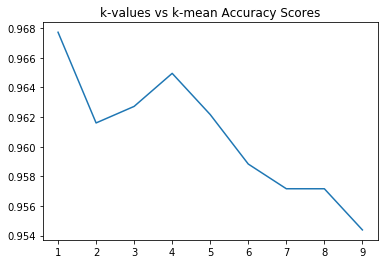

In [8]:
k_values = range(1,10,1)
accuracy_scores = []

for k in k_values:
    accuracy_scores.append(cross_validate(k))
    
plt.plot(k_values, accuracy_scores)
plt.title('k-values vs k-mean Accuracy Scores')
plt.show()

Here, as we increase the number of k-nearest neighbors, we basically get a decrease in accuracy score. 

# Neural Network (Single hidden layer)

In [9]:
from sklearn.neural_network import MLPClassifier

neurons = [8,16,32,64,128,256]
results = {}
for n in neurons:
    nn = MLPClassifier(hidden_layer_sizes=(n,))
    kf = KFold(n_splits=4, random_state = 2)
    
    mean_scores_nn = []
    
    for train_index, test_index in kf.split(data):
        train_features, train_labels = data.loc[train_index], labels[train_index]
        test_features, test_labels = data.loc[test_index], labels[test_index]
    
        nn.fit(train_features, train_labels)
        prediction = nn.predict(test_features)
    
        score = accuracy_score(test_labels, prediction)
        mean_scores_nn.append(score)
    
    results[n] = (np.sum(mean_scores_nn)/len(mean_scores_nn))

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

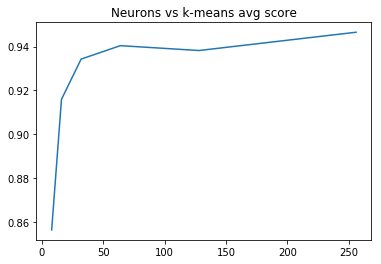

In [10]:
x = results.keys()
y = results.values()

plt.plot(x,y)
plt.title('Neurons vs k-means avg score')
plt.show()

When we use a single layer and slowly increase the number of neurons, the accuracy score increases signaficantly and caps around 94%

# Neural Network (Double Layer)

In [11]:
neurons = [64,128,256]
results = {}
for n in neurons:
    nn = MLPClassifier(hidden_layer_sizes=(n,n))
    kf = KFold(n_splits=4, random_state = 2)
    
    mean_scores_nn = []
    
    for train_index, test_index in kf.split(data):
        train_features, train_labels = data.loc[train_index], labels[train_index]
        test_features, test_labels = data.loc[test_index], labels[test_index]
    
        nn.fit(train_features, train_labels)
        prediction = nn.predict(test_features)
    
        score = accuracy_score(test_labels, prediction)
        mean_scores_nn.append(score)
    
    results[n] = (np.sum(mean_scores_nn)/len(mean_scores_nn))

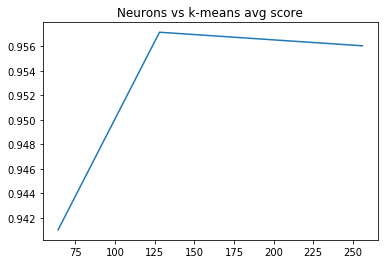

In [12]:
x = results.keys()
y = results.values()

plt.plot(x,y)
plt.title('Neurons vs k-means avg score')
plt.show()

It looks like using two hidden layer and increasing the number of neurons increases our accuracy score from around 94% to 95.75%